# __Лінійна регресія (Навчання з учителем)__

(Розв'язання задачі лінійної регресії за допомогою `sklearn`)

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

`Housing.csv`<br>
Знайдіть найкращі параметри w⃗ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень.
<br><br>


Лінійна регресія з однією змінною (`h`)
<br>
`h(x) = w_0 + w_1 * x`  #  залежність від одного параметру `x`, і `x_0 = 1`
<br><br>
Лінійна регресія з багатьма змінними (`h` = `linear_regression_hypothesis`)
<br>
`h(x) = w⋅x`  # залежність від багатьох параметрів `x_1...x_n`, і `x_0 = 1`.

In [482]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [483]:
def set_seed(seed_value: int) -> None:
    """Set a random state for repeatability of results."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    # tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = 'true'
    

set_seed(1)

### __`OBTAIN` & `SCRUB`__ + __`EXPLORE`__ (DATASET)

In [484]:
# prepare data
full_df = pd.read_csv('Housing.csv')
full_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


- df = full_df
- df.price = y = df[0]
- df.area = x_1 = df[1]
- df.bedrooms = x_2 = df[2]
- df.bathrooms = x_3 = df[3]
- df.stories = x_4 = df[4]
- df.parking = x_5 = df[10]

In [485]:
full_df = full_df.replace('no', 0).replace('yes', 1)
full_df = full_df.dropna(axis=1)

###### __MANUAL NORMALIZATION__

In [486]:
# prepare df:
new_df = full_df.iloc[:, 0:4]
new_df.head(3)

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2


In [487]:
def normalization(data) -> list:
    """Return normalized values (list) of the array_like object (data)."""
    mean: float = np.mean(data)
    value_range = np.max(data) - np.min(data)

    return [(x - mean) / value_range for x in data]

In [488]:
# # new_df = pd.DataFrame()
# # new_df['price'] = normalization(full_df.price)
# # new_df['area'] = normalization(full_df.area)
# # new_df['bedrooms'] = normalization(full_df.bedrooms)
# # new_df['bathrooms'] = normalization(full_df.bathrooms)
# full_df = full_df.replace('no', 0).replace('yes', 1)
# full_df = full_df.dropna(axis=1)

def input_train_data_preparation(X: pd.DataFrame) -> pd.DataFrame:
    new_df = pd.DataFrame()
    for el_c in X.columns:
        new_df[el_c] = normalization(X[el_c])
    
    return new_df


new_df = input_train_data_preparation(full_df.iloc[:, :4]).dropna(axis=1)
new_df.head(3)

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920


In [489]:
new_df = input_train_data_preparation(full_df.iloc[:, :4]).dropna(axis=1)
new_df.head(3)

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920


In [490]:
X = np.array([new_df.area, new_df.bedrooms, new_df.bathrooms]).T
y = np.array(new_df.price)

In [491]:
X[:5]

array([[ 0.15597654,  0.20697248,  0.23792049],
       [ 0.26181847,  0.20697248,  0.90458716],
       [ 0.33054699,  0.00697248,  0.23792049],
       [ 0.16147483,  0.20697248,  0.23792049],
       [ 0.15597654,  0.20697248, -0.09541284]])

In [492]:
y[:5]

array([0.73881132, 0.64790223, 0.64790223, 0.64487193, 0.57517496])

###### __BY CLASS PREPARED_DATA__

In [493]:
class PreparedData:

    def __init__(self, input_train_data: pd.DataFrame) -> None:
        self.data = input_train_data.describe()
        # test.append(pd.Series(['James', 95, 'M'], index=test.columns), ignore_index=True)
        self.data.loc['value_range'] = [self.data.loc['max'][col] - self.data.loc['min'][col] for col in self.data.columns]

    def input_data_preparation(self, input_data: pd.DataFrame) -> pd.DataFrame:
        """Return normalized data for prediction."""
        new_df = pd.DataFrame()

        for el_c in input_data.columns:
            new_df[el_c] = self.normalization(input_data[el_c], el_c)
        
        return new_df
    
    def normalization(self, input_data: pd.DataFrame, el_c: str) -> list:
        """Return normalized values (list) of the array_like object (data)."""
        # value_range = np.max(input_data) - np.min(input_data)

        return [(x - self.data.loc['mean'][el_c]) / self.data.loc['value_range'][el_c] for x in input_data]
    
    def denormalization(self, value: float, feature_name: str) -> float:
        return value * self.data.loc['value_range'][feature_name] + self.data.loc['mean'][feature_name]

In [494]:
# full_df = full_df.replace('no', 0).replace('yes', 1)
# full_df = full_df.dropna(axis=1)

In [495]:
# for col in full_df.columns:
#     full_df[col] = full_df[col].apply(lambda x: np.where(x.isdigit(), x, '0') if isinstance(x, str) else x).astype('int64')

In [496]:
data = PreparedData(full_df.iloc[:, :4])
data.input_data_preparation(pd.DataFrame({'area': {0:8000}, 'bedrooms':  {0:2}, 'bathrooms': {0:2}})).dropna(axis=1)

,area,bedrooms,bathrooms
0,0.195839,-0.193028,0.23792


In [497]:
test_price = data.input_data_preparation(pd.DataFrame({'price': {0:13300000}, 'area': {0:7420}, 'bedrooms':  {0:4}, 'bathrooms': {0:2}})).dropna(axis=1)['price'][0]

In [498]:
data.input_data_preparation(pd.DataFrame({'price': {0:13300000}, 'area': {0:7420}, 'bedrooms':  {0:4}, 'bathrooms': {0:2}}))

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.23792


In [499]:
data.denormalization(test_price, 'price')

13300000.0

In [500]:
new_x = full_df.iloc[:, 1:4]
new_y = full_df.iloc[:, 0:1]

In [501]:
new_x.head(3)

,area,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2


In [502]:
X = data.input_data_preparation(new_x).to_numpy()
y = data.input_data_preparation(new_y).to_numpy().reshape(-1)

In [503]:
X[:5]

array([[ 0.15597654,  0.20697248,  0.23792049],
       [ 0.26181847,  0.20697248,  0.90458716],
       [ 0.33054699,  0.00697248,  0.23792049],
       [ 0.16147483,  0.20697248,  0.23792049],
       [ 0.15597654,  0.20697248, -0.09541284]])

In [504]:
y[:5]

array([0.73881132, 0.64790223, 0.64790223, 0.64487193, 0.57517496])

In [505]:
new_df = data.input_data_preparation(full_df.iloc[:, 0:4])

### __`MODEL`__

Лінійна регресія:

- https://scikit-learn.org/stable/modules/linear_model.html

In [506]:
from sklearn.linear_model import LinearRegression

#### __`Training`__

In [507]:
regr = LinearRegression().fit(X, y)

In [508]:
# intercept_  =>  Independent term in the linear model  (w_0)
# coef_  =>  Estimated coefficients for the linear regression problem. (w_1, w_2, ... w_i)
# score(X, y[, sample_weight])  =>  Return the coefficient of determination of the prediction.
regr.intercept_, regr.coef_, regr.score(X, y)

(7.014204135081997e-17,
 array([0.47714269, 0.17611257, 0.36001286]),
 0.4870830667058762)

### __`INTERPRET`__ / __`Error Analysis`__

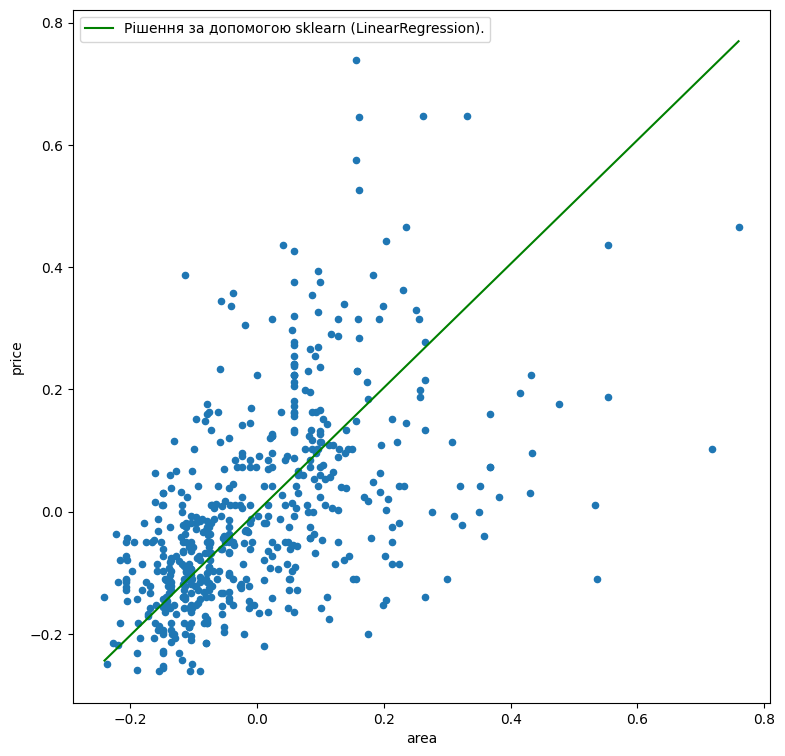

In [509]:
x = np.linspace(np.min(new_df.area), np.max(new_df.area), 3)
y1 = [regr.predict(np.array([[xi, xi, xi]])) for xi in x]

new_df.plot(x='area', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y1, label='Рішення за допомогою sklearn (LinearRegression).', color='green')

plt.legend()
plt.show()

In [544]:
inpd = data.input_data_preparation(pd.DataFrame({'area': {0:45000}, 'bedrooms':  {0:5}, 'bathrooms': {0:3}})).dropna(axis=1)

In [545]:
test_price = regr.predict(inpd.to_numpy())

In [546]:
data.denormalization(test_price, 'price')[0]  # 13300000 real, predicted: 7036627.154627561

23063400.965915933